In [90]:
%matplotlib inline

import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import numpy as np


def add_relative_to_current_source_file_path_to_sys_path(relpath):
    import os, sys, inspect
    path = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile(inspect.currentframe()))[0],relpath)))
    if path not in sys.path:
        sys.path.insert(0,path)

add_relative_to_current_source_file_path_to_sys_path("../../shims/toric")   

import toric
import toric.samples

#
# Helper functions for the toric libary
#

def vector3_to_str(v):
    return "(%.2f, %.2f, %.2f)" % (v.x(), v.y(), v.z())
    
def toric_to_str(t):
    return "(a = %.2f°, t = %2.f°, p = %.2f°)" % (t.getAlpha().valueDegrees(), t.getTheta().valueDegrees(), t.getPhi().valueDegrees())

def vector3_to_np3(v):
    return np.array([v.x(),v.y(),v.z()])

def vector3_to_np2(v):
    return np.array([v.x(),v.y()])

def toric_to_cam_np(t, PA, PB):
    c = toric.Toric3_ToWorldPosition(t, PA, PB)
    return vector3_to_np3(c)


In [139]:
#
# OK, let's assume we want to calculate a trajectory between these positions:
#

# let's set a minimum distance of 0.9m
min_dist = 1

# starting people positons
PA_1 = toric.Vector3(0,0,0)
PB_1 = toric.Vector3(2,0,0)

# ending people positions: for the moment the positions are the same
PA_2 = toric.Vector3(0,0,0)
PB_2 = toric.Vector3(2,0,0)

# Starting camera position is *outside* of PA_1:
C_1 = toric.Vector3(-1,-0.5,0)
C_2 = toric.Vector3( 3,-1,0)


In [140]:
def drawSetup():
    pylab.rcParams['figure.figsize'] = 8, 8

    circle_PA_1=plt.Circle((PA_1.x(),PA_1.y()),min_dist,color='g',alpha=0.5)
    circle_PB_1=plt.Circle((PB_1.x(),PB_1.y()),min_dist,color='g',alpha=0.5)

    fig = plt.gcf()
    fig.gca().add_artist(circle_PA_1)
    fig.gca().add_artist(circle_PB_1)

    # Set up plot size
    fudgeX = 3
    fudgeY_pos = 2
    fudgeY_neg = 8
    plt.axes().set_xlim((np.min([PA_1.x(), PB_1.x()])-fudge,np.max([PA_1.x(), PB_1.x()])+fudge))
    plt.axes().set_ylim((np.min([PA_1.y(), PB_1.y()])-fudgeY_neg,np.max([PA_1.y(), PB_1.y()])+fudgeY_pos))

    # Draw People Positions
    plt.scatter([PA_1.x(), PB_1.x()],[PA_1.y(), PB_1.y()],c="red",linewidths=0)

    # Draw Circles
    
    plt.axes().set_aspect('equal')

    # Draw Camera positions
    plt.scatter([C_1.x(), C_2.x()],[C_1.y(), C_2.y()],c="blue",linewidths=0)

def scatterplot_camera_arr(C):
    plt.scatter(C[:,0],C[:,1],cmap='copper',linewidths=0)
    

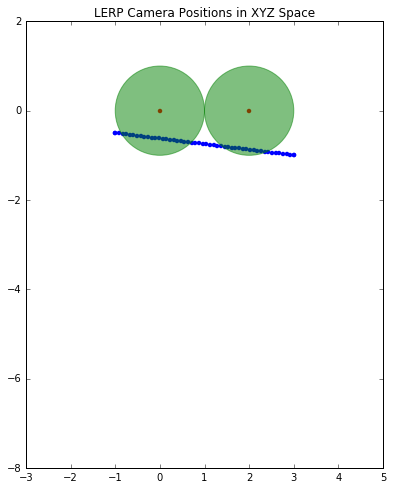

In [141]:
#
# Consider linear interpolation
#

drawSetup()
plt.title("Linear interpolation from Cam1 to Cam2")
xlin = np.linspace(C_1.x(), C_2.x())
ylin = np.linspace(C_1.y(), C_2.y())
plt.scatter(xlin,ylin,linewidths=0)
plt.title("LERP Camera Positions in XYZ Space")

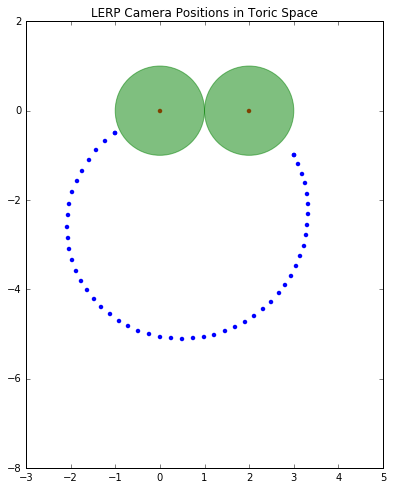

In [142]:
#
# Consider interpolating in toric space directly
# (eg. lerp alpha, theta, phi)
#

drawSetup()

def map_toric_to_cam(a):
    t = toric.Toric3(toric.RadianPi(a[0]),toric.Radian2Pi(a[1]),toric.RadianPi(a[2]))
    return toric_to_cam_np(t, PA_1, PB_1)

C_1_toric = toric.Toric3_FromWorldPosition(C_1,PA_1,PB_1)
C_2_toric = toric.Toric3_FromWorldPosition(C_2,PA_1,PB_1)

alpha_lin = np.linspace(C_1_toric.getAlpha().valueRadians(),C_2_toric.getAlpha().valueRadians())
theta_lin = np.linspace(C_1_toric.getTheta().valueRadians(),C_2_toric.getTheta().valueRadians())
phi_lin   = np.linspace(C_1_toric.getPhi().valueRadians(),  C_2_toric.getPhi().valueRadians())

P = np.c_[ alpha_lin, theta_lin, phi_lin ]
C = np.apply_along_axis(map_toric_to_cam, axis=1, arr=P)

scatterplot_camera_arr(C)
plt.title("LERP Camera Positions in Toric Space")